In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls "/content/gdrive/My Drive/"

 Archive				    'Information Analyzer'
'Colab Notebooks'			    'Memorable pics'
'Copy of GLMR.ipynb'			    'My baby'
'Data science'				    'New folder'
 Devops-Learning			    'SAS '
 Documents				    'SAS certificate'
 Git					    'Udemy Complete Python Course '
'Greatlakes Hackathon'			     Useful
'Great learning solutions for Assignments'


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
starttime=time.time()

fund_config=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/fund_config.csv")
print('fund_config file shape:',fund_config.shape)

fund_allocations=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/fund_allocations.csv")
print('fund_allocations file shape:',fund_allocations.shape)
      
fund_ratios=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/fund_ratios.csv")
print('fund_ratios file shape:',fund_ratios.shape)
    
fund_specs=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/fund_specs.csv")
print('fund_specs file shape:',fund_specs.shape)
      
other_specs=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/other_specs.csv")
print('other_specs file shape:',other_specs.shape)

bond_ratings = pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/bond_ratings.csv")
print('bond_ratings file shape:',bond_ratings.shape)
    
return_3year=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/return_3year.csv")
print('return_3year file shape:',return_3year.shape)
      
      
return_5year=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/return_5year.csv")
print('return_5year file shape:',return_5year.shape)

      
return_10year=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/return_10year.csv")
print('return_10year file shape:',return_10year.shape)


sample_submission=pd.read_csv("/content/gdrive/My Drive/Greatlakes Hackathon/sample_submission.csv")
print('sample_submission file shape:',sample_submission.shape)

print("----timetaken is ..... ", (time.time()-starttime))

fund_config file shape: (25000, 4)
fund_allocations file shape: (25000, 12)
fund_ratios file shape: (25000, 8)
fund_specs file shape: (25000, 9)
other_specs file shape: (25000, 43)
bond_ratings file shape: (25000, 12)
return_3year file shape: (25000, 17)
return_5year file shape: (25000, 17)
return_10year file shape: (25000, 17)
sample_submission file shape: (5000, 2)
----timetaken is .....  0.579819917678833


In [5]:
fund_config.head(1)

,category,parent_company,fund_id,fund_name
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...


In [6]:
fund_config.columns

Index(['category', 'parent_company', 'fund_id', 'fund_name'], dtype='object')

In [7]:
fund_ratios.columns

Index(['fund_id', 'tag', 'fund_ratio_net_annual_expense', 'pb_ratio',
       'ps_ratio', 'mmc', 'pc_ratio', 'pe_ratio'],
      dtype='object')

In [0]:
numeric_columns=['fund_ratio_net_annual_expense', 'pb_ratio',
       'ps_ratio', 'mmc', 'pc_ratio', 'pe_ratio']

In [9]:
fund_ratios.head(1)

,fund_id,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio
0,264614c6-5ac3-4146-ba26-1674b136cb40,67922,1.44,1.71,1.31,"19,857.41",5.91,14.51


In [0]:
fund_ratios.replace(',', '', regex=True,inplace=True)

In [0]:
fund_ratios[numeric_columns]=fund_ratios[numeric_columns].apply(pd.to_numeric,errors='coerce')

In [0]:
fund_conf_ratio=pd.merge(fund_config, fund_ratios, on = 'fund_id', how = 'inner')

In [0]:
fund_specs['inception_date'] = pd.to_datetime(fund_specs['inception_date'], format='%Y-%m-%d')

In [0]:
from datetime import datetime
import math
def convert_to_date_delta(d):
    start_date = datetime(1924,7,7)
    delta = (d-start_date).days
    return delta

In [0]:
fund_specs["inception_date_delta"] = fund_specs["inception_date"].apply(lambda x: convert_to_date_delta(x))

In [16]:
fund_specs.columns

Index(['investment_class', 'currency', 'total_assets', 'yield',
       'greatstone_rating', 'inception_date', 'tag', 'fund_size', 'return_ytd',
       'inception_date_delta'],
      dtype='object')

In [17]:
other_specs.head(1)

,2014_category_return,2012_return_category,years_up,2018_return_category,tag,category_return_1year,cash_percent_of_portfolio,pc_ratio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,pb_ratio,2017_category_return,1_year_return_fund,pe_ratio,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,mmc,stock_percent_of_portfolio,2016_return_category,ps_ratio,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,greatstone_rating,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return
0,NaN,NaN,1.0,-16.32,67922,13.05,1.19,5.91,NaN,20.19,2.0,NaN,4.2,NaN,20.19,19.1,1.71,-5.78,18.4,14.51,NaN,0.0,19.1,0.0,16.14,"19,857.41",98.81,27.3,1.31,NaN,NaN,4.24,NaN,-12.23,-3.31,NaN,1.75,-34.98,4.12,0.0,0.0,NaN,NaN


In [18]:
other_specs.isnull().sum()

2014_category_return                  6183
2012_return_category                  9124
years_up                              1812
2018_return_category                   809
tag                                      0
category_return_1year                  115
cash_percent_of_portfolio              114
pc_ratio                               114
2011_return_category                 10533
ytd_return_fund                        115
years_down                            1641
2014_return_fund                      7206
category_return_1month                 115
2013_return_fund                      8538
fund_return_3months                    115
ytd_return_category                    115
pb_ratio                               114
2017_category_return                  1428
1_year_return_fund                     115
pe_ratio                               114
2015_return_fund                      5688
portfolio_convertable                  114
3_months_return_category               115
portfolio_o

In [0]:
other_specs['positive_year']=other_specs['years_up']-other_specs['years_down']

In [0]:
other_specs1=other_specs[['tag','positive_year','ytd_return_fund','stock_percent_of_portfolio','cash_percent_of_portfolio','category_ratio_net_annual_expense','1_year_return_fund','1_month_fund_return','2018_return_fund','greatstone_rating']]

In [124]:
other_specs1.corr()

,tag,positive_year,ytd_return_fund,stock_percent_of_portfolio,cash_percent_of_portfolio,category_ratio_net_annual_expense,1_year_return_fund,1_month_fund_return,2018_return_fund,greatstone_rating
tag,1.000000,0.020730,0.012214,0.002400,0.011304,-0.069322,0.014168,0.003320,0.005405,0.001028
positive_year,0.020730,1.000000,-0.057085,-0.164549,-0.180811,-0.174425,0.276561,0.077997,0.313010,0.181579
ytd_return_fund,0.012214,-0.057085,1.000000,0.757472,-0.348886,0.124828,0.284721,0.122493,-0.432633,0.111862
stock_percent_of_portfolio,0.002400,-0.164549,0.757472,1.000000,-0.335317,0.228938,0.000681,-0.082821,-0.573849,0.007762
cash_percent_of_portfolio,0.011304,-0.180811,-0.348886,-0.335317,1.000000,0.266537,-0.147369,-0.052516,0.135825,-0.136719
category_ratio_net_annual_expense,-0.069322,-0.174425,0.124828,0.228938,0.266537,1.000000,-0.172990,-0.106408,-0.246641,-0.055144
1_year_return_fund,0.014168,0.276561,0.284721,0.000681,-0.147369,-0.172990,1.000000,0.336056,0.669259,0.220991
1_month_fund_return,0.003320,0.077997,0.122493,-0.082821,-0.052516,-0.106408,0.336056,1.000000,0.228584,0.123632
2018_return_fund,0.005405,0.313010,-0.432633,-0.573849,0.135825,-0.246641,0.669259,0.228584,1.000000,0.182740
greatstone_rating,0.001028,0.181579,0.111862,0.007762,-0.136719,-0.055144,0.220991,0.123632,0.182740,1.000000


In [0]:
other_specs1=other_specs1.drop(['greatstone_rating'],axis=1)

In [0]:
other_specs1.replace(',', '', regex=True,inplace=True)

In [0]:
other_specs1=other_specs1.apply(pd.to_numeric)

In [128]:
All_specs = pd.merge(fund_specs, other_specs1, on = 'tag', how = 'inner')
All_specs.shape

(25000, 18)

In [129]:
fund_conf_ratio_spec = pd.merge(fund_conf_ratio, All_specs, on = 'tag', how = 'inner')
fund_conf_ratio_spec.shape

(25000, 28)

In [130]:
fund_merge_file = pd.merge(fund_conf_ratio_spec, fund_allocations, left_on = 'tag',right_on='id', how = 'inner')
fund_merge_file.shape

(25000, 40)

In [0]:
return_3year = return_3year.replace(',', '',regex=True)
return_5year = return_5year.replace(',', '',regex=True)
return_10year = return_10year.replace(',', '',regex=True)

In [132]:
return_10year.columns

Index(['10years_category_r_squared', '10yrs_sharpe_ratio_fund',
       '10_years_alpha_fund', '10years_fund_r_squared', '10years_fund_std',
       '10yrs_sharpe_ratio_category', '10_years_beta_fund',
       '10yrs_treynor_ratio_fund', 'fund_id',
       '10_years_return_mean_annual_category', '10yrs_treynor_ratio_category',
       '10_years_return_fund', '10_years_alpha_category',
       '10_years_beta_category', '10years_category_std',
       '10_years_return_mean_annual_fund', '10_years_return_category'],
      dtype='object')

In [0]:
num_cols=return_10year._get_numeric_data().columns

In [0]:
return_3year=return_3year.apply(pd.to_numeric,errors='coerce')

return_5year=return_5year.apply(pd.to_numeric,errors='coerce')

return_10year[num_cols]=return_10year[num_cols].apply(pd.to_numeric,errors='coerce')
return_10year['10yrs_treynor_ratio_fund']=return_10year['10yrs_treynor_ratio_fund'].apply(pd.to_numeric,errors='coerce')

In [0]:
return_10year['10_years_return_fund'] = return_10year['10_years_return_fund'].replace('0', 'np.nan',regex=True)

In [0]:
return_3_5year=pd.merge(return_3year, return_5year, on = 'tag', how = 'inner')

In [0]:
fund_merge_filereturns_3_5yrs=pd.merge(fund_merge_file, return_3_5year, on = 'tag', how = 'inner')

In [0]:
fund_merge_filereturns_3_5_10yrs=pd.merge(fund_merge_filereturns_3_5yrs, return_10year, on = 'fund_id', how = 'inner')

In [0]:
#df=fund_merge_file[fund_merge_file['greatstone_rating'].notnull()]
df=fund_merge_filereturns_3_5_10yrs.copy()

In [140]:
df.columns

Index(['category', 'parent_company', 'fund_id', 'fund_name', 'tag',
       'fund_ratio_net_annual_expense', 'pb_ratio', 'ps_ratio', 'mmc',
       'pc_ratio', 'pe_ratio', 'investment_class', 'currency', 'total_assets',
       'yield', 'greatstone_rating', 'inception_date', 'fund_size',
       'return_ytd', 'inception_date_delta', 'positive_year',
       'ytd_return_fund', 'stock_percent_of_portfolio',
       'cash_percent_of_portfolio', 'category_ratio_net_annual_expense',
       '1_year_return_fund', '1_month_fund_return', '2018_return_fund',
       'portfolio_communication_allocation', 'portfolio_financial_services',
       'portfolio_industrials_allocation', 'portfolio_tech_allocation',
       'portfolio_materials_basic_allocation', 'portfolio_energy_allocation',
       'portfolio_consumer_defence_allocation',
       'portfolio_healthcare_allocation', 'portfolio_property_allocation',
       'id', 'portfolio_utils_allocation',
       'portfolio_cyclical_consumer_allocation', '3yrs_tre

In [0]:
df1=df.corr()

In [142]:
df1['greatstone_rating'].sort_values(ascending=False).head(20)

greatstone_rating                   1.000000
5yrs_sharpe_ratio_fund              0.499828
10yrs_sharpe_ratio_fund             0.456945
3yrs_sharpe_ratio_fund              0.448965
fund_return_3years                  0.433455
3_years_alpha_fund                  0.422781
5_years_return_fund                 0.410994
5_years_alpha_fund                  0.402320
5_years_return_mean_annual_fund     0.351916
10_years_alpha_fund                 0.341150
3_years_return_mean_annual_fund     0.297223
10_years_return_fund                0.294849
10_years_return_mean_annual_fund    0.262206
1_year_return_fund                  0.220991
2018_return_fund                    0.182740
positive_year                       0.181579
10yrs_sharpe_ratio_category         0.124333
1_month_fund_return                 0.123632
return_ytd                          0.112224
ytd_return_fund                     0.111862
Name: greatstone_rating, dtype: float64

In [0]:
cols = df.columns

NUM = (df._get_numeric_data().columns).to_list()
CAT= cols.difference(NUM).to_list()
NUM.remove('greatstone_rating')

In [144]:
print(CAT)

['category', 'currency', 'fund_id', 'fund_name', 'fund_size', 'inception_date', 'investment_class', 'parent_company']


In [0]:
missing_df =df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(df.shape[0]-missing_df['Missing Values Count'])/df.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)
missing_df.to_csv("missing_df")

In [146]:
missing_df[missing_df['Filling Factor (%)'] < 99].sort_index()

,Column Name,Missing Values Count,Filling Factor (%)
11,investment_class,1480,94.080
15,greatstone_rating,5000,80.000
17,fund_size,1480,94.080
20,positive_year,3075,87.700
27,2018_return_fund,940,96.240
40,3yrs_treynor_ratio_fund,1648,93.408
41,3_years_alpha_fund,1648,93.408
43,3yrs_sharpe_ratio_fund,1648,93.408
45,3_years_return_mean_annual_fund,1648,93.408
46,fund_beta_3years,1648,93.408


In [0]:
df.to_csv('df.csv')

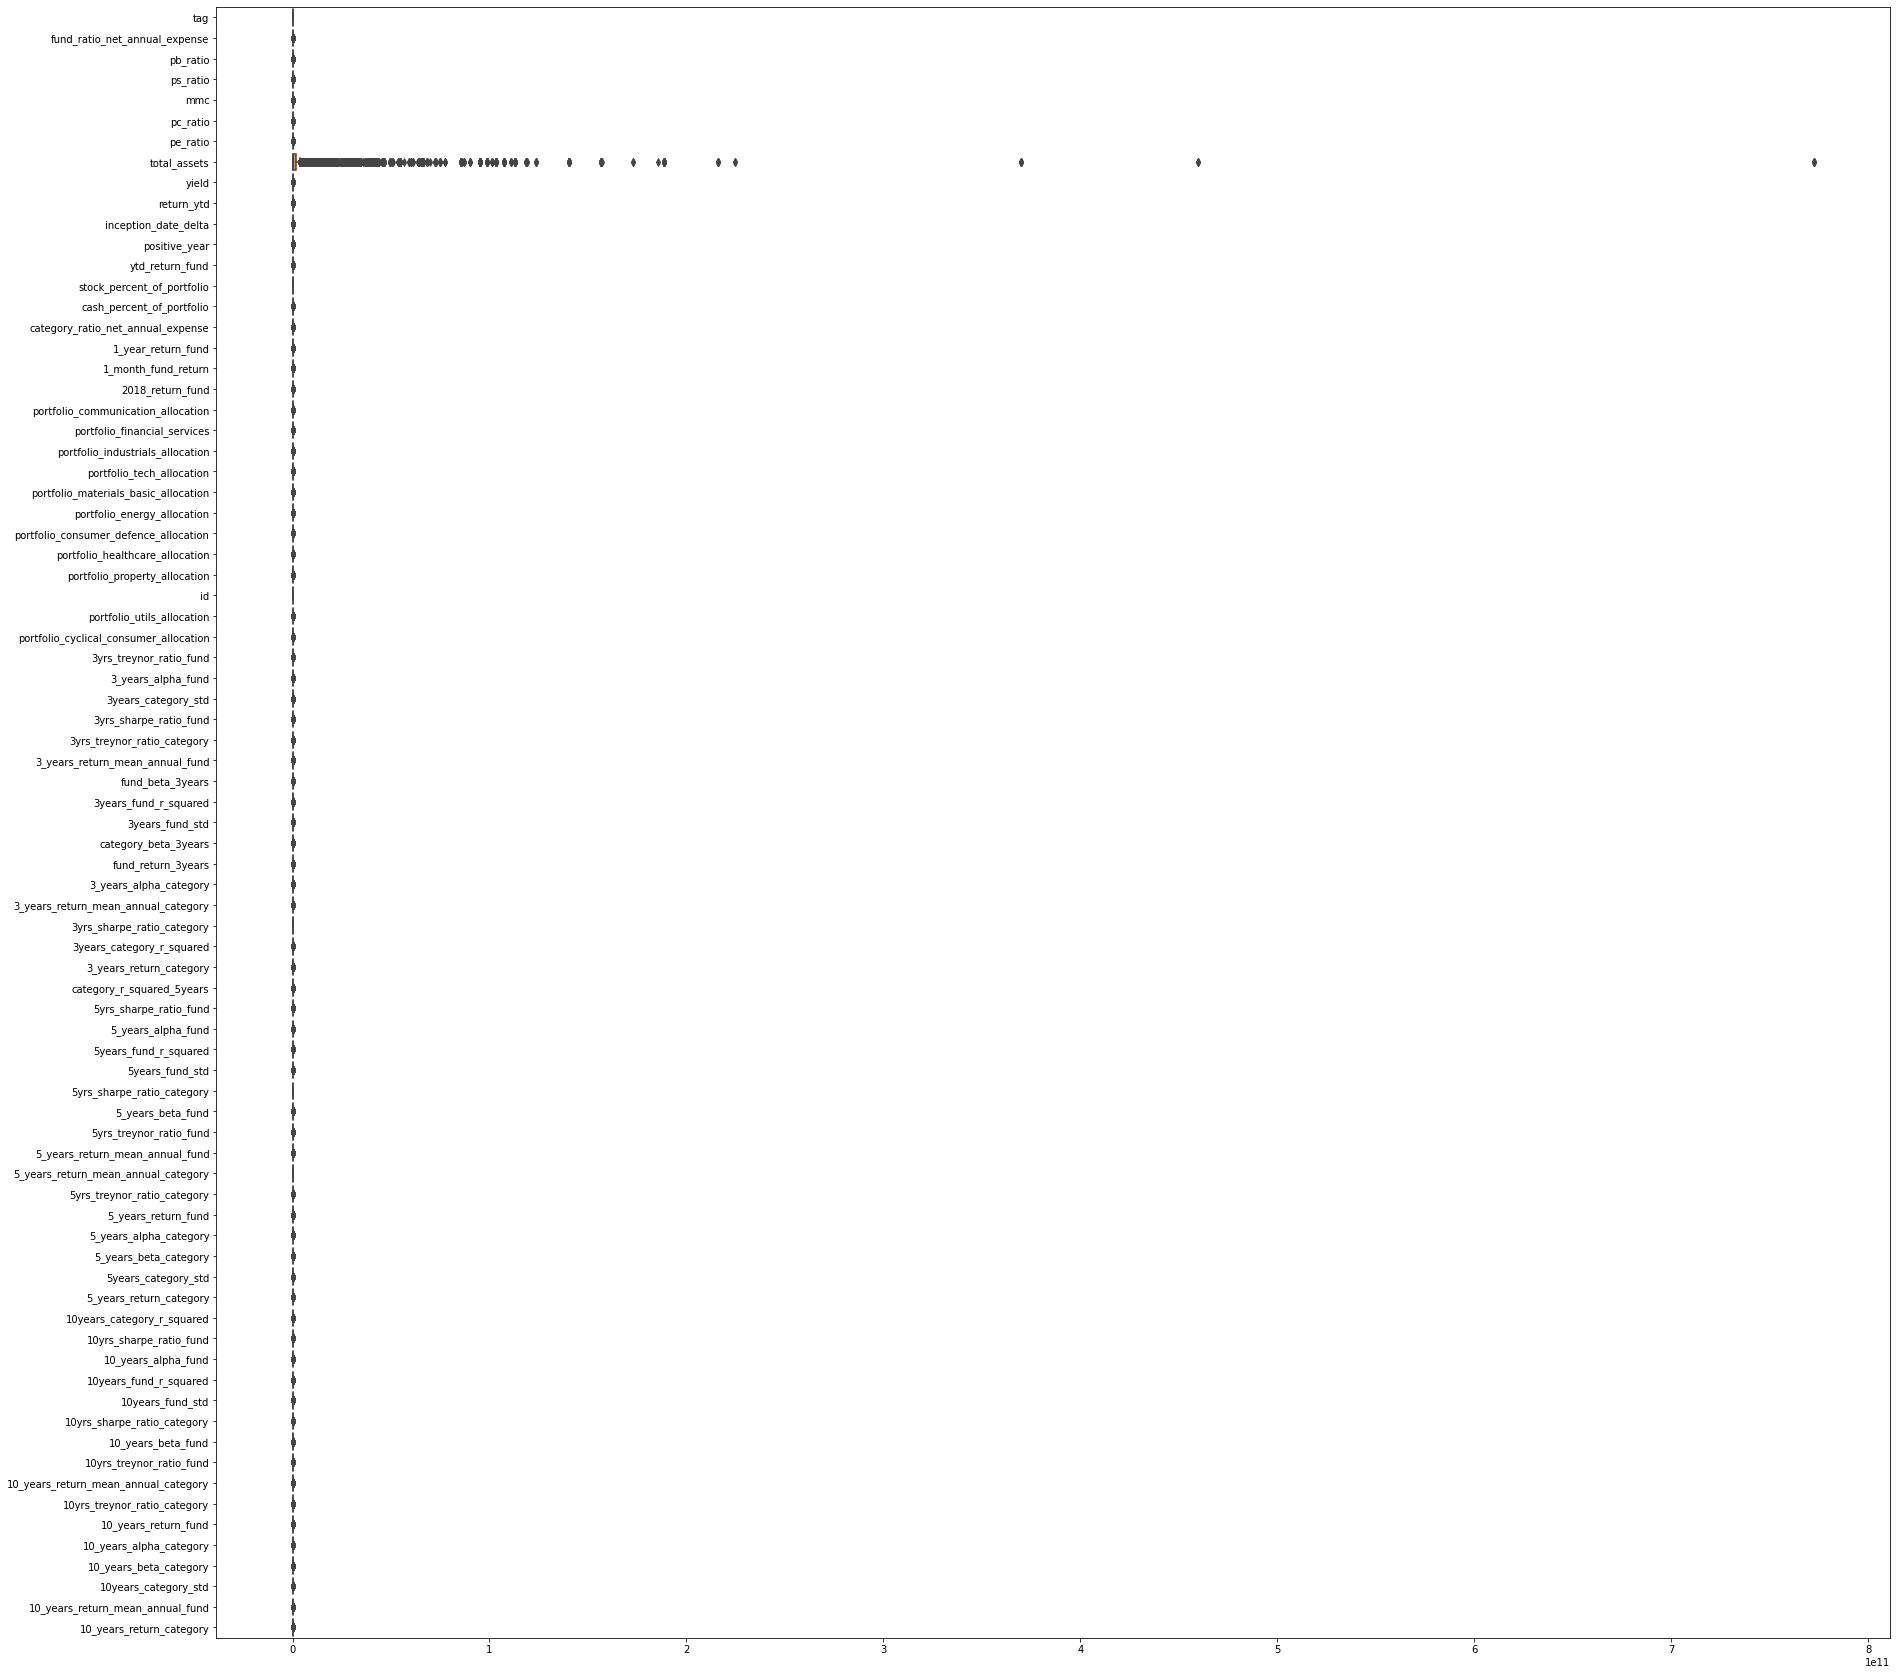

In [148]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df[NUM],orient='h')

In [0]:
#outliers replacing by whiskers
def outliers_handling(cols):
    cols = pd.DataFrame(cols)
    Q1 = cols.quantile(0.25)
    Q3 = cols.quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)

    # Replace every outlier on the lower side by the lower whisker
    for i, j in zip(np.where(cols < Q1 - 1.5 * IQR)[0], np.where(cols < Q1 - 1.5 * IQR)[1]): 

        whisker  = Q1 - 1.5 * IQR
        cols.iloc[i,j] = whisker[j]


    #Replace every outlier on the upper side by the upper whisker    
    for i, j in zip(np.where(cols > Q3 + 1.5 * IQR)[0], np.where(cols > Q3 + 1.5 * IQR)[1]):

        whisker  = Q3 + 1.5 * IQR
        cols.iloc[i,j] = whisker[j]
        
    return cols

In [ ]:
def outliers_handling(cols):
    cols = pd.DataFrame(cols)
    Q1 = cols.quantile(0.25)
    Q3 = cols.quantile(0.75)
    IQR = Q3 - Q1
    # print(IQR)

    # Replace every outlier on the lower side by the lower whisker
    for i, j in zip(np.where(cols < Q1 - 1.5 * IQR)[0], np.where(cols < Q1 - 1.5 * IQR)[1]): 
        mean  = Q1 - 1.5 * IQR
        cols.iloc[i,j] = mean[j]


    #Replace every outlier on the upper side by the upper whisker    
    for i, j in zip(np.where(cols > Q3 + 1.5 * IQR)[0], np.where(cols > Q3 + 1.5 * IQR)[1]):
        mean  = Q3 + 1.5 * IQR
        cols.iloc[i,j] = whisker[j]
        
    return cols

In [0]:
df.total_assets=outliers_handling(df.total_assets)

In [0]:
df=df.drop(['3yrs_treynor_ratio_fund','5yrs_treynor_ratio_fund','5yrs_treynor_ratio_fund'],axis=1)

In [0]:
df['investment_class'] = df['investment_class'].replace(np.nan, 'mode')
df['fund_size'] = df['fund_size'].replace(np.nan, 'unknown')

In [0]:
cols_to_transform = ['investment_class','fund_size']
df = pd.get_dummies( data = df, columns = cols_to_transform ,drop_first=True)

In [0]:
#first we make a dictionary that maps each label to the counts
category_frequency_map = df.category.value_counts().to_dict()
parent_company_frequency_map=df.parent_company.value_counts().to_dict()

df.category = df.category.map(category_frequency_map)
df.parent_company=df.parent_company.map(parent_company_frequency_map)




In [155]:
train=df[df['greatstone_rating'].notnull()]
test=df[df['greatstone_rating'].isnull()]

train.shape,test.shape

((20000, 90), (5000, 90))

In [156]:
train['category'].value_counts()

1282    1044
1335    1044
1126     901
960      763
855      666
        ... 
9          6
7          6
8          6
4          4
2          2
Name: category, Length: 102, dtype: int64

In [0]:
ordered_labels_for_pc = train.groupby(['parent_company'])['greatstone_rating'].mean().to_dict()

ordered_labels_for_category=train.groupby(['category'])['greatstone_rating'].mean().to_dict()

In [158]:
train.category.isnull().value_counts()

False    20000
Name: category, dtype: int64

In [0]:
test=pd.merge(sample_submission,test,on='fund_id')

In [160]:
test.head(1)

,fund_id,greatstone_rating_x,category,parent_company,fund_name,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,currency,total_assets,yield,greatstone_rating_y,inception_date,return_ytd,inception_date_delta,positive_year,ytd_return_fund,stock_percent_of_portfolio,cash_percent_of_portfolio,category_ratio_net_annual_expense,1_year_return_fund,1_month_fund_return,2018_return_fund,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,3_years_alpha_fund,...,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,investment_class_Growth,investment_class_Value,investment_class_mode,fund_size_Medium,fund_size_Small,fund_size_unknown
0,85a6edf9-db47-490c-981a-168ce90434bb,NaN,233,330,Nuveen Kentucky Municipal Bond Fund Class I,87272,0.66,0.0,0.0,0.0,0.0,0.0,USD,336200000.0,3.21,NaN,1997-02-06,2.71,26512,15.0,2.71,0.0,0.0,0.94,4.67,1.49,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87272,0.0,0.0,-0.2,...,0.0,0.95,1.9,0.92,1.02,0.19,96.73,2.66,0.01,0.87,0.29,0.0,0.03,3.55,-0.0,0.01,0.03,3.16,0.92,1.15,0.12,97.12,3.66,0.01,0.97,4.4,0.0,0.04,4.71,-0.01,0.01,0.04,0.39,4.22,0,0,0,1,0,0


In [0]:
test=test.drop(['greatstone_rating_x','greatstone_rating_y'],axis=1)

In [162]:
train.isnull().sum()

category                  0
parent_company            0
fund_id                   0
fund_name                 0
tag                       0
                         ..
investment_class_Value    0
investment_class_mode     0
fund_size_Medium          0
fund_size_Small           0
fund_size_unknown         0
Length: 90, dtype: int64

In [0]:
to_drop=['fund_id','id','currency','fund_name','greatstone_rating','inception_date']

In [0]:
to_drop_test=['fund_id','id','currency','fund_name','inception_date']

In [0]:
#train data
X_train = train.drop(columns=to_drop,axis=1)    # Predictors
y_train = train.loc[:,'greatstone_rating']

#test data
X_test = test.drop(columns=to_drop_test,axis=1)    # Predictors



In [0]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [167]:
starttime=time.time()

from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)

X_train=imp.fit_transform(X_train)
X_test=imp.fit_transform(X_test)

print("----timetaken is ..... ", (time.time()-starttime))

----timetaken is .....  54.17634391784668


In [0]:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


from sklearn.model_selection import GridSearchCV
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 3)
CV_model.fit(X_train, y_train)


CV_model.best_params_


model1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=6, criterion='gini')

model1.fit(X_train,y_train)
y_predict=clf1.predict(X_test)


In [169]:
starttime=time.time()

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier(n_estimators=1000)

clf1.fit(X_train, y_train)


y_predict=clf1.predict(X_test)


print("----timetaken is ..... ", (time.time()-starttime))


----timetaken is .....  110.2671537399292


In [170]:
for feature in zip(train.columns, clf1.feature_importances_):
    print(feature)

('category', 0.008147771008005279)
('parent_company', 0.010221150438904468)
('fund_id', 0.013542333050736238)
('fund_name', 0.018130223850546596)
('tag', 0.007423735018672771)
('fund_ratio_net_annual_expense', 0.007378739846821098)
('pb_ratio', 0.007920407079495624)
('ps_ratio', 0.00738978517272609)
('mmc', 0.00795591710545659)
('pc_ratio', 0.017540895903037326)
('pe_ratio', 0.014438398711880124)
('currency', 0.013799375065524082)
('total_assets', 0.032565284509360706)
('yield', 0.01260604092752521)
('greatstone_rating', 0.013649285470913682)
('inception_date', 0.007835400768903333)
('return_ytd', 0.01088664864333484)
('inception_date_delta', 0.006668733039315593)
('positive_year', 0.016829504548006146)
('ytd_return_fund', 0.013468277941688762)
('stock_percent_of_portfolio', 0.015766232481393982)
('cash_percent_of_portfolio', 0.006209812714635347)
('category_ratio_net_annual_expense', 0.007086794480077207)
('1_year_return_fund', 0.007214569431312005)
('1_month_fund_return', 0.007668515

In [171]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf1, threshold=0.0005)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=None,
                                                 oob_score=False

In [0]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [0]:
clf_important = RandomForestClassifier(n_estimators=500)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)
y_predict1=clf_important.predict(X_important_test)


In [0]:
test['greatstone_rating']=pd.DataFrame(y_predict)


In [182]:
test.head()

,fund_id,category,parent_company,fund_name,tag,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,currency,total_assets,yield,inception_date,return_ytd,inception_date_delta,positive_year,ytd_return_fund,stock_percent_of_portfolio,cash_percent_of_portfolio,category_ratio_net_annual_expense,1_year_return_fund,1_month_fund_return,2018_return_fund,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,id,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,...,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,investment_class_Growth,investment_class_Value,investment_class_mode,fund_size_Medium,fund_size_Small,fund_size_unknown,greatstone_rating
0,85a6edf9-db47-490c-981a-168ce90434bb,233,330,Nuveen Kentucky Municipal Bond Fund Class I,87272,0.66,0.00,0.00,0.00,0.00,0.00,USD,3.362000e+08,3.21,1997-02-06,2.71,26512,15.0,2.71,0.00,0.00,0.94,4.67,1.49,0.84,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,87272,0.00,0.00,-0.20,0.03,0.35,...,0.95,1.90,0.92,1.02,0.19,96.73,2.66,0.01,0.87,0.29,0.00,0.03,3.55,-0.00,0.01,0.03,3.16,0.92,1.15,0.12,97.12,3.66,0.01,0.97,4.40,0.00,0.04,4.71,-0.01,0.01,0.04,0.39,4.22,0,0,0,1,0,0,4.0
1,654dac08-5e5d-4cf0-870e-3167087de7d2,50,702,MFS Utilities Fund Class R1,160073,1.75,1.85,1.59,23043.98,6.63,17.92,USD,3.330000e+09,1.61,2005-03-31,12.01,29487,9.0,12.01,95.03,3.59,1.15,14.85,3.51,0.10,19.02,0.00,0.00,0.00,0.00,16.2,0.00,0.00,0.0,160073,64.78,0.00,3.25,0.11,0.94,...,0.13,9.39,0.16,0.41,0.05,53.49,10.75,0.01,0.71,0.43,0.01,0.25,4.68,0.06,0.00,0.12,8.87,0.29,0.97,3.04,69.89,11.92,0.01,0.72,15.98,0.01,0.30,11.89,0.07,0.00,0.11,1.00,12.25,0,1,0,0,0,0,2.0
2,75214019-f876-42a9-a316-328b759ac4ba,302,20,Metropolitan West Unconstrained Bond Fund Class M,166391,1.04,2.81,4.05,0.00,0.70,15.64,USD,3.100000e+09,3.50,2011-09-29,2.33,31860,5.0,2.33,0.04,9.67,1.18,3.31,0.78,0.67,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,166391,0.00,0.00,1.71,0.03,1.80,...,0.14,3.71,0.12,1.60,1.26,22.98,0.99,0.01,0.17,0.20,0.00,-0.13,2.40,0.01,-0.00,0.03,2.04,0.07,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.00,0.14,0.00,0.04,0.00,0.04,NaN,4.99,1,0,0,1,0,0,4.0
3,1fe8de6d-cd33-489e-a829-211f1f622eed,249,395,Prudential Day One 2020 Fund Class R1,183797,1.15,2.00,1.50,40535.72,7.80,15.38,USD,4.004000e+07,1.86,2016-12-12,7.05,33761,0.0,7.05,38.18,14.60,0.46,3.26,1.41,-4.70,3.18,12.30,9.85,17.68,3.21,4.6,6.78,11.67,18.0,183797,2.84,9.90,NaN,0.05,NaN,...,0.94,6.57,0.94,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.00,0.04,0.00,-0.00,0.01,0.06,4.58,0.94,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.09,0.00,-0.00,0.01,0.08,NaN,9.23,0,0,0,0,0,0,0.0
4,bd87a7a0-6ca5-4607-a0cf-d396ecd6037a,1335,395,PGIM Jennison Growth Fund- Class C,190232,1.69,7.77,4.16,151311.23,19.14,29.25,USD,3.910455e+09,0.00,1995-11-01,17.23,26049,9.0,17.23,99.45,0.55,1.06,10.51,2.19,-1.89,0.77,11.48,7.92,36.96,0.00,0.0,3.99,14.26,1.0,190232,0.00,23.61,2.42,0.13,1.15,...,0.84,15.35,0.86,0.89,0.96,80.13,13.86,0.01,1.11,1.09,0.01,0.10,12.84,-0.00,0.01,0.13,11.2

In [0]:
sample_submission1=test[['fund_id','greatstone_rating']]

In [184]:
sample_submission1.head()

,fund_id,greatstone_rating
0,85a6edf9-db47-490c-981a-168ce90434bb,4.0
1,654dac08-5e5d-4cf0-870e-3167087de7d2,2.0
2,75214019-f876-42a9-a316-328b759ac4ba,4.0
3,1fe8de6d-cd33-489e-a829-211f1f622eed,0.0
4,bd87a7a0-6ca5-4607-a0cf-d396ecd6037a,3.0


In [0]:
sample_submission1.to_csv('samplefile3.csv',index=False)